In [1]:
# Set up a cluster using dask
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()

cluster.scale(20)
cluster

In [2]:
#Make a client so you can see the progress of tasks (click the link that appears below)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.5084fd9b852f46f88478b6c7aec39b55/status,


In [3]:
import intake
import pandas as pd
import pprint
import fsspec

import xarray as xr
import xgcm
import numpy as np
import s3fs

import matplotlib.pyplot as plt
%matplotlib inline

import dask

In [4]:
col = intake.open_esm_datastore(
    "https://raw.githubusercontent.com/NCAR/cesm-lens-aws/main/intake-catalogs/aws-cesm1-le.json")
col_subset = col.search(experiment="20C",variable=["TEMP", "PD"])
#col_subset = col.search(experiment="20C",variable=["TEMP"])
dsets = col_subset.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


/tmp/ipykernel_1185/3641793112.py:5: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dsets = col_subset.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})


In [5]:
ds = dsets['ocn.20C.monthly']
theta = ds.TEMP

url = "s3://ncar-cesm-lens/ocn/static/grid.zarr"
fs = s3fs.S3FileSystem(anon=True)
grid_ds = xr.open_zarr(s3fs.S3Map(url, s3=fs))

In [6]:
ens1 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens1.nc')
ens2 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens2.nc')
ens3 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens3.nc')
ens4 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens4.nc')
ens5 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens5.nc')
ens6 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens6.nc')
ens7 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens7.nc')
ens8 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens8.nc')
ens9 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens9.nc')
ens10 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens10.nc')
ens11 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens11.nc')
ens12 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens12.nc')
ens13 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens13.nc')
ens14 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens14.nc')
ens15 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens15.nc')
ens16 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens16.nc')
ens17 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens17.nc')
ens18 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens18.nc')
ens19 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens19.nc')
ens20 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens20.nc')
ens21 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens21.nc')
ens22 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens22.nc')
ens23 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens23.nc')
ens24 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens24.nc')
ens25 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens25.nc')
ens26 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens26.nc')
ens27 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens27.nc')
ens28 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens28.nc')
ens29 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens29.nc')
ens30 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens30.nc')
ens31 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens31.nc')
ens32 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens32.nc')
ens33 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens33.nc')
ens34 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens34.nc')
ens35 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens35.nc')

def select_time(ens):
    rolling_moc = ens.max_MOC.rolling(time=10*12).mean()
    select_times = rolling_moc.where(rolling_moc>19829615).dropna('time')
    return select_times



select_times1 = select_time(ens1)
select_times2 = select_time(ens2)
select_times3 = select_time(ens3)
select_times4 = select_time(ens4)
select_times5 = select_time(ens5)
select_times6 = select_time(ens6)
select_times7 = select_time(ens7)
select_times8 = select_time(ens8)
select_times9 = select_time(ens9)
select_times10 = select_time(ens10)
select_times11 = select_time(ens11)
select_times12 = select_time(ens12)
select_times13 = select_time(ens13)
select_times14 = select_time(ens14)
select_times15 = select_time(ens15)
select_times16 = select_time(ens16)
select_times17 = select_time(ens17)
select_times18 = select_time(ens18)
select_times19 = select_time(ens19)
select_times20 = select_time(ens20)
select_times21 = select_time(ens21)
select_times22 = select_time(ens22)
select_times23 = select_time(ens23)
select_times24 = select_time(ens24)
select_times25 = select_time(ens25)
select_times26 = select_time(ens26)
select_times27 = select_time(ens27)
select_times28 = select_time(ens28)
select_times29 = select_time(ens29)
select_times30 = select_time(ens30)
select_times31 = select_time(ens31)
select_times32 = select_time(ens32)
select_times33 = select_time(ens33)
select_times34 = select_time(ens34)
select_times35 = select_time(ens35)


In [7]:
th0 = theta.roll(nlon=60).sel(nlon=slice(0,110))
grid0 = grid_ds.roll(nlon=60,roll_coords=True).sel(nlon=slice(0,110))
timeslice = slice('1940-01-01','2016-02-01')

In [8]:
thickness = (xr.ones_like(th0.isel(member_id = 0, time=0))*grid0.dz).isel(z_t = slice(0,20)).sum('z_t')

heat_mean = (th0.isel(member_id = slice(0,2))*grid0.dz).isel(z_t = slice(0,30)).sum('z_t').sel(time = timeslice).mean('time').mean('member_id')/thickness

heat_select_1 = (th0.isel(member_id = 0).sel(time = select_times1.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_2 = (th0.isel(member_id = 1).sel(time = select_times2.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_3 = (th0.isel(member_id = 2).sel(time = select_times3.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_4 = (th0.isel(member_id = 3).sel(time = select_times4.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_5 = (th0.isel(member_id = 4).sel(time = select_times5.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_6 = (th0.isel(member_id = 5).sel(time = select_times6.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_7 = (th0.isel(member_id = 6).sel(time = select_times7.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_8 = (th0.isel(member_id = 7).sel(time = select_times8.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_9 = (th0.isel(member_id = 8).sel(time = select_times9.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_10 = (th0.isel(member_id = 9).sel(time = select_times10.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_11 = (th0.isel(member_id = 10).sel(time = select_times11.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_12 = (th0.isel(member_id = 11).sel(time = select_times12.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_13 = (th0.isel(member_id = 12).sel(time = select_times13.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_14 = (th0.isel(member_id = 13).sel(time = select_times14.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_15 = (th0.isel(member_id = 14).sel(time = select_times15.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_16 = (th0.isel(member_id = 15).sel(time = select_times16.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_17 = (th0.isel(member_id = 16).sel(time = select_times17.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_18 = (th0.isel(member_id = 17).sel(time = select_times18.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_19 = (th0.isel(member_id = 18).sel(time = select_times19.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_20 = (th0.isel(member_id = 19).sel(time = select_times20.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_21 = (th0.isel(member_id = 20).sel(time = select_times21.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_22 = (th0.isel(member_id = 21).sel(time = select_times22.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_23 = (th0.isel(member_id = 22).sel(time = select_times23.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_24 = (th0.isel(member_id = 23).sel(time = select_times24.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_25 = (th0.isel(member_id = 24).sel(time = select_times25.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_26 = (th0.isel(member_id = 25).sel(time = select_times26.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_27 = (th0.isel(member_id = 26).sel(time = select_times27.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_28 = (th0.isel(member_id = 27).sel(time = select_times28.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_29 = (th0.isel(member_id = 28).sel(time = select_times29.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_30 = (th0.isel(member_id = 29).sel(time = select_times30.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_31 = (th0.isel(member_id = 30).sel(time = select_times31.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_32 = (th0.isel(member_id = 31).sel(time = select_times32.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_33 = (th0.isel(member_id = 32).sel(time = select_times33.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_34 = (th0.isel(member_id = 33).sel(time = select_times34.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness
heat_select_35 = (th0.isel(member_id = 34).sel(time = select_times35.time)*grid0.dz).isel(z_t = slice(0,30)).sum('z_t')/thickness


In [9]:
heat_select = xr.concat([heat_select_1,heat_select_2, heat_select_3, heat_select_4, 
                         heat_select_5,heat_select_6, heat_select_7, heat_select_8
                        , heat_select_9, heat_select_10,heat_select_11,heat_select_12, heat_select_13, heat_select_14, 
                         heat_select_15,heat_select_16, heat_select_17, heat_select_18
                        , heat_select_19, heat_select_20,heat_select_21,heat_select_22, heat_select_23, heat_select_24, 
                         heat_select_25,heat_select_26, heat_select_27, heat_select_28
                        , heat_select_29, heat_select_30,heat_select_31,heat_select_32, heat_select_33, heat_select_34, 
                         heat_select_35],dim='time').mean('time')

In [10]:

diff_heat = (heat_select-heat_mean).load()

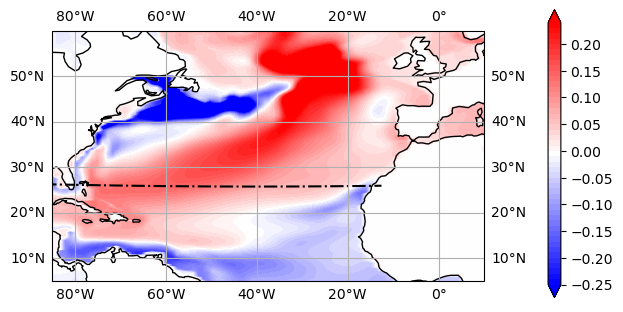

In [11]:
import cartopy.crs as ccrs
import cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

#ax = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())

ax.coastlines()

lons_26 = grid0.TLONG.isel(nlat=slice(200,400)).values
lons_26[lons_26>180] = lons_26[lons_26>180]-360
cs=ax.contourf(lons_26,grid0.TLAT.isel(nlat=slice(200,400)),diff_heat.isel(nlat=slice(200,400)).values,
               transform = ccrs.PlateCarree(),levels=np.arange(-0.25,0.25,0.01),cmap='bwr',extend='both')
ax.gridlines(draw_labels=True)

#diff_heat.isel(nlat=slice(200,400)).plot()#.isel(time=10).p
lons_26 = grid0.TLONG[270,0:85].values
lons_26[lons_26>180] = lons_26[lons_26>180]-360
lats_26 = grid0.TLAT[270,0:85].values
plt.plot(lons_26,lats_26,'k',transform = ccrs.PlateCarree(),linestyle='-.')


plt.ylim(5,60)
plt.xlim(-85,10)

fig = plt.gcf()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
plt.colorbar(cs, cax=cbar_ax)

fig = plt.gcf()
fig.savefig('composite.png')

In [12]:
cluster.shutdown()